<a href="https://colab.research.google.com/github/NicoMedinaa/Laboratorio_Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  #Importamos librerias
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, DBSCAN
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crimenes.csv') #Leemos el scv y lo guardamos en df

In [3]:
data= df[["Asaltos", "Violaciones","Poblacion Urbana","Asesinatos"]].to_numpy() #Guardamos en data los datos interesentas a analizar

A continuacion con data realizamos el grafico del codo para decidir que numero de cluster utilizar debido a que despues de pensarlo en grupo llegamos a la conclusion que usar KMeans seria la opcion mas adecuada para este analisis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

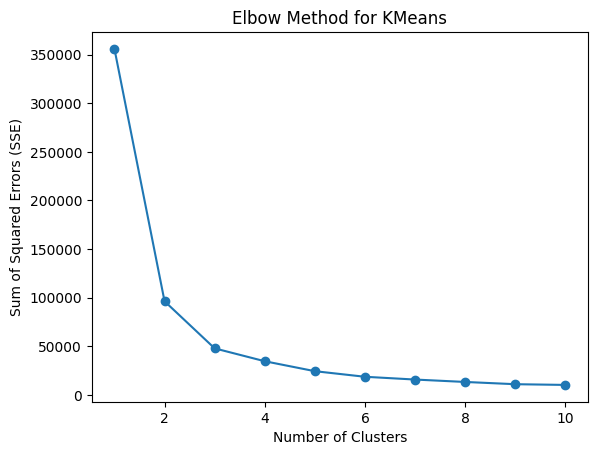

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def find_optimal_clusters_kmeans(data, max_k):
    sse = [] # Sum of squared errors
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k).fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for KMeans")
    plt.show()

# Ejemplo:
find_optimal_clusters_kmeans(data, 10)

Decidimos aplicar KMeans con un numera de clusters igual a 3

In [6]:

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Realizamos un grafico como los vistos en clase

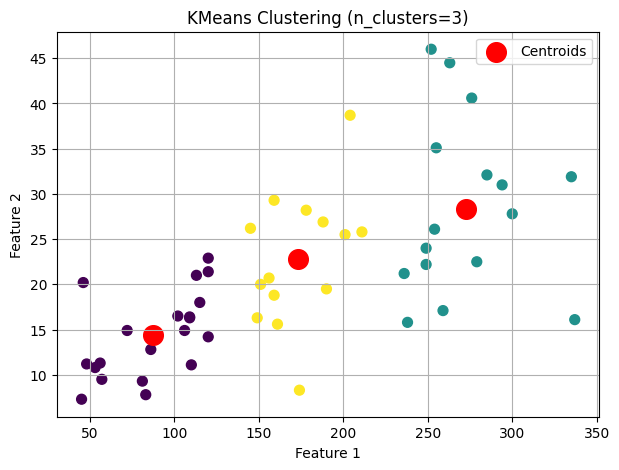

In [12]:


# Graficar los resultados
plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label="Centroids")
plt.title('KMeans Clustering (n_clusters=3)')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Debido a que data posea 4 columnas de información decidimos hacer un grafico en 3 dimension, aun no se llega a mostrar todo debido a que hacerlo es imposible de graficar pero nos da un poco mas de detalle visual

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


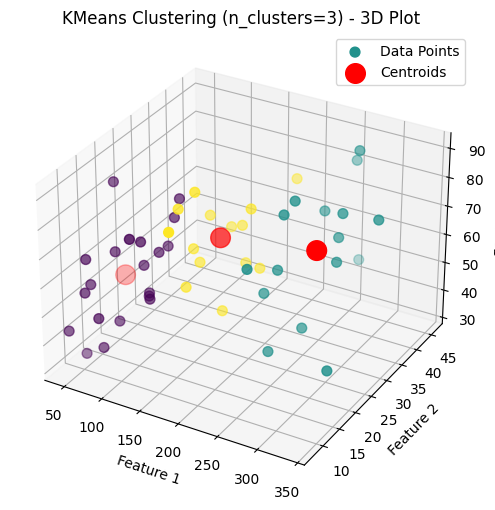

In [14]:
# Importar librerías necesarias
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)

# Graficar los resultados en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Visualizar las cuatro columnas en el gráfico 3D
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=clusters, s=50, cmap='viridis', label='Data Points')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='o', label="Centroids")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering (n_clusters=3) - 3D Plot')
ax.legend()
plt.show()

Una ves visto los graficos nos dimos cuanta que el modelo separaba bien en 3 grupos pero no sabiamos que eran estos grupos

Para intentar descubrilo decidimos hacer una columna de target en df donde guardariamos los resultados

In [10]:
df['target'] = kmeans.labels_

Una ves obtenidos los resultados decidimos utilizar lo aprendido previamente y realizar graficos para ver la sumatora de cada factor de peligrosidad en los targets

In [16]:
import plotly.graph_objects as go

grouped_df = df.groupby('target')['Violaciones'].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_df["target"],
    y=grouped_df["Violaciones"],
    marker=dict(color=grouped_df["target"], colorscale='RdYlGn'),
    text=grouped_df["Violaciones"],
    textposition='auto',
))

# Configurar los ejes y los títulos
fig.update_layout(
    title="Total de violaciones por target",
    xaxis=dict(title="Target"),
    yaxis=dict(title="Total de violaciones"),
)

fig.show()

In [17]:
fig = go.Figure()

grouped_df = df.groupby('target')['Asaltos'].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_df["target"],
    y=grouped_df["Asaltos"],
    marker=dict(color=grouped_df["target"], colorscale='RdYlGn'),
    text=grouped_df["Asaltos"],
    textposition='auto',
))

# Configurar los ejes y los títulos
fig.update_layout(
    title="Total de asaltos por target",
    xaxis=dict(title="Target"),
    yaxis=dict(title="Total de asaltos"),
)

fig.show()

In [18]:
fig = go.Figure()

grouped_df = df.groupby('target')['Poblacion Urbana'].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_df["target"],
    y=grouped_df["Poblacion Urbana"],
    marker=dict(color=grouped_df["target"], colorscale='RdYlGn'),
    text=grouped_df["Poblacion Urbana"],
    textposition='auto',
))

# Configurar los ejes y los títulos
fig.update_layout(
    title="Total de poblacion por target",
    xaxis=dict(title="Target"),
    yaxis=dict(title="Total de poblacion"),
)

fig.show()

In [19]:
fig = go.Figure()

grouped_df = df.groupby('target')['Asesinatos'].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_df["target"],
    y=grouped_df["Asesinatos"],
    marker=dict(color=grouped_df["target"], colorscale='RdYlGn'),
    text=grouped_df["Asesinatos"],
    textposition='auto',
))

# Configurar los ejes y los títulos
fig.update_layout(
    title="Total de asesinatos por target",
    xaxis=dict(title="Target"),
    yaxis=dict(title="Total de asesinatos"),
)

fig.show()

Una ves visto los graficos llegamos a la conclusion de que el algoritmo clasifica como 1 a aquellos lugares con alta peligrosidad en relacion a su poblacion, en 0 aquellos lugares con alta poblacion y baja peligrosidad y en 2 los lugares con una poblacion mas pequeña, pequeña en relacion a los otros dos target, y una peligrosidad un poco mas alta que en el caso 0